In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from modules import *
from sim import *


In [3]:
sim = Sim(3, "gas", "data_d49_l8_b20.npz", epsilon_SF=None)


Moving to directory '/home/za9132/scratch/romain/round3/gas'.


Text(0, 0.5, 'number of cells [$10^{6}$]')

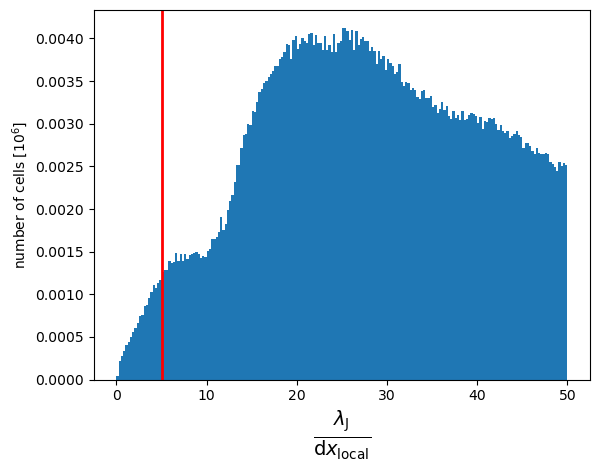

In [130]:
jeans_length = np.sqrt(5/3 * sim.pressure / sim.density) / np.sqrt(const.G * sim.density)
jeans_per_cell = jeans_length / sim.dx

plt.hist(jeans_per_cell.flatten(), range=(0, 50), bins=200, weights=np.full_like(jeans_per_cell.flatten(), 1e-6));
plt.axvline(x=5, lw=2, color='red')
plt.xlabel(r'$\frac{\lambda_{\rm J}}{{\rm d}x_{\rm local}}$', fontsize=20)
plt.ylabel("number of cells [$10^{6}$]")



### quicklook

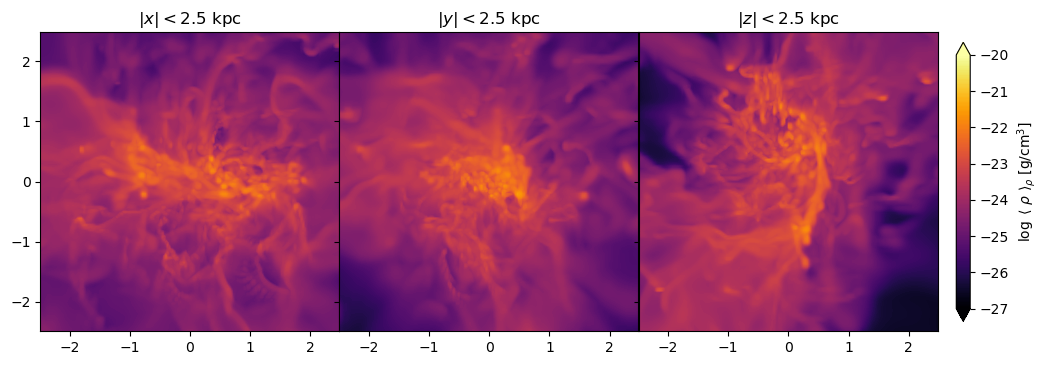

In [111]:
kwargs = {
    "field": "density",
    "extrema": (1e-27, 1e-20),
    "avg": True,
    "project": True,
    "slice": Arglist([[X, Y, Z]]),
    "title": Arglist([[r"$|x| < %.3g~{\rm kpc}$" % (sim.box_size/2/const.kpc), r"$|y| < %.3g~{\rm kpc}$" % (sim.box_size/2/const.kpc), r"$|z| < %.3g~{\rm kpc}$" % (sim.box_size/2/const.kpc)]]),
    "do_log": True,
    "cmap": 'inferno',
    "cbar_tick_increment": 1.,
    "cbar_label": r'$\log~\langle~\rho~\rangle_\rho$ [${\rm g/cm^{3}}$]'
}

sim.plot_grid(**kwargs, nrows=1, ncols=3, figsize=(12, 5), wspace=1e-3, hspace=None, sharey=True, share_cbar=True, do_axes_labels=False)


Text(0.5, 1.02, 'Multi-Freefall Model\n$|z| < 2.5~{\\rm kpc}$')

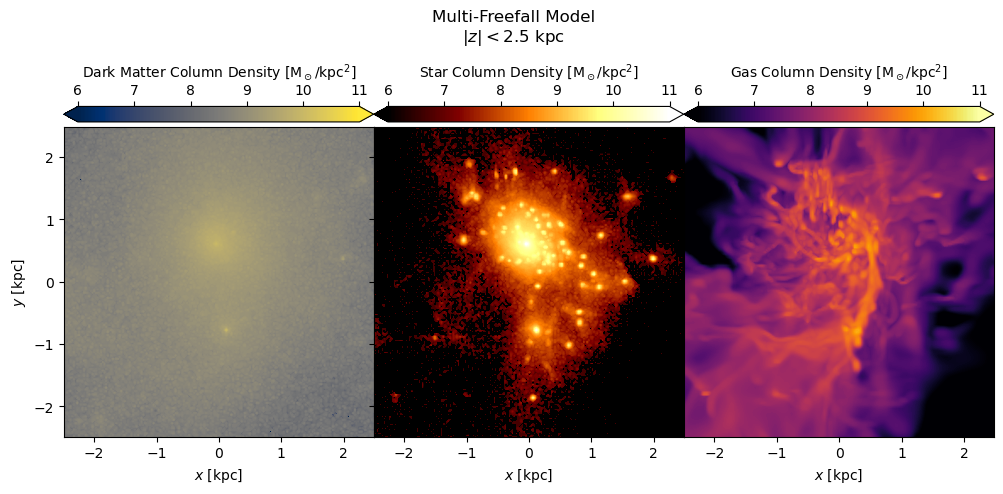

In [112]:
slice = Z
slice_label = ["x", "y", "z"][slice]

kwargs = {
    "field": Arglist([["density_dm", "density_star", "density"]]),
    "unit": const.M_sol / const.kpc**2,
    "extrema": (1e6, 1e11),
    "avg": False,
    "project": True,
    "slice": slice,
    "do_log": True,
    "cmap": Arglist([['cividis', 'afmhot', 'inferno']]),
    "cbar_tick_increment": 1.,
    "cbar_label": Arglist([[
        r'Dark Matter Column Density [${\rm M_\odot / kpc^2}$]',
        r'Star Column Density [${\rm M_\odot / kpc^2}$]',
        r'Gas Column Density [${\rm M_\odot / kpc^2}$]'
    ]]),
    "cbar_orientation": "horizontal",
    "max_pixels": 256
}

sim.plot_grid(**kwargs, nrows=1, ncols=3, figsize=(12, 5), wspace=1e-3, hspace=None, sharey=True)

plt.suptitle(sim.sim_latex + "\n" + r'$|%s| < %.3g~{\rm kpc}$' % (slice_label, sim.box_size/2/const.kpc), y=1.02)

# sim.save_fig("all-density-%s" % slice_label)


<Axes: title={'center': '$|z| < 1~{\\rm kpc}$'}, xlabel='$x$ [kpc]', ylabel='$y$ [kpc]'>

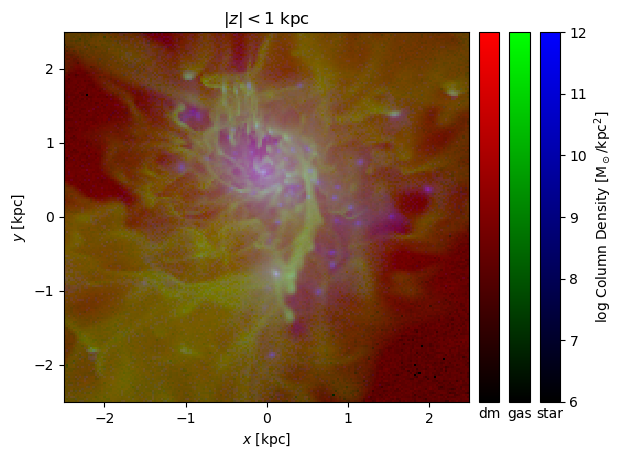

In [113]:
slice = Z
slice_label = ["x", "y", "z"][slice]
coord1_idx, coord2_idx = np.sort([(slice + 1) % 3, (slice + 2) % 3])

sim.plot("density_dm", "density", "density_star", (1e6, 1e12), unit=const.M_sol/const.kpc**2, xlabels=["dm", "gas", "star"], plot_type='rgb_slice', slice=slice, title=r'$|%s| < 1~{\rm kpc}$' % slice_label, project=True, do_log=True, avg=False, cbar_label=r'log Column Density [${\rm M_\odot / kpc^2}$]', cbar_tick_increment=1.)

# sim.save_fig("denisty-rgb-proj-%s" % slice_label)


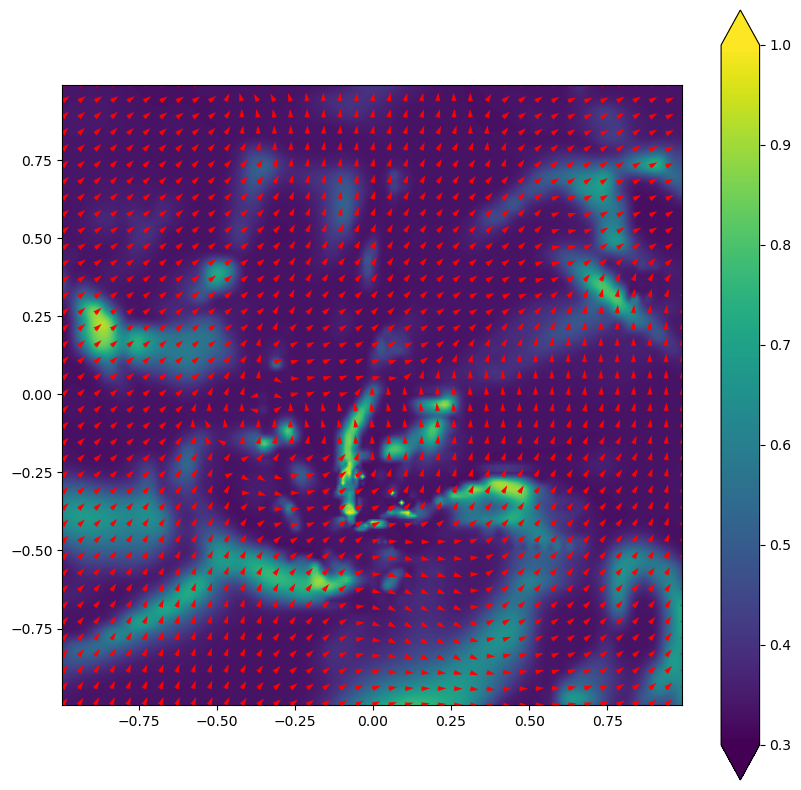

In [67]:
skip = 5

plt.figure(figsize=(10, 10))

x2d = sim.coord[X, :, :, sim.N//2] / const.kpc
y2d = sim.coord[Y, :, :, sim.N//2] / const.kpc
vx2d = sim.vel_vec[X, :, :, sim.N//2] / const.km
vy2d = sim.vel_vec[Y, :, :, sim.N//2] / const.km
bturb2d = sim.b_turb[:, :, sim.N//2]

im = plt.contourf(x2d.T, y2d.T, bturb2d, cmap='viridis', levels=np.linspace(0.3, 1.0, 200), extend='both')
#plt.streamplot(x2d.T, y2d.T, vx2d, vy2d, color='red', density=3)

cbar = plt.colorbar(im, ticks=np.arange(0.3, 1.1, 0.1))

vx2d_norm = vx2d / np.sqrt(vx2d**2 + vy2d**2)
vy2d_norm = vy2d / np.sqrt(vx2d**2 + vy2d**2)

plt.quiver(x2d[::skip, ::skip], y2d[::skip, ::skip], vx2d_norm[::skip, ::skip], vy2d_norm[::skip, ::skip], color='red', width=0.005)

plt.gca().set_aspect(True)

#plt.xlim(-0.1, 0.1)
#plt.ylim(-0.1, 0.1)


Saved figure as 'jeans_test-121820231143.png'


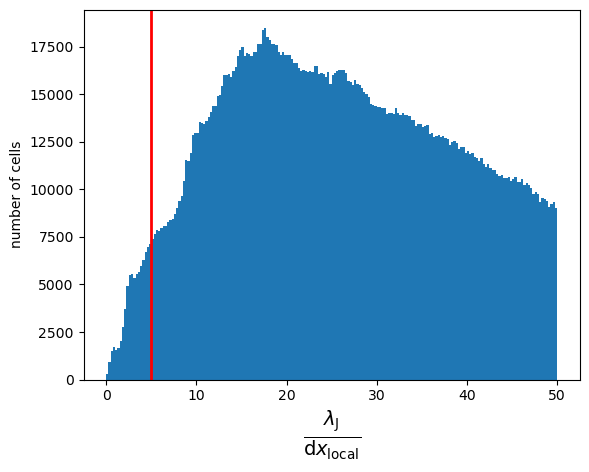

In [45]:
jeans_length = sim.c_s / np.sqrt(const.G * sim.density)
jeans_per_cell = jeans_length / sim.dx_local

plt.hist(jeans_per_cell.flatten(), range=(0, 50), bins=200);
plt.axvline(x=5, lw=2, color='red')
plt.xlabel(r'$\frac{\lambda_{\rm J}}{{\rm d}x_{\rm local}}$', fontsize=20)
plt.ylabel("number of cells")

save_fig('jeans_test')


### column density

In [126]:
density_sph = sim.interp_to_sph(sim.density)
col_density = np.sum(density_sph * sim.dx_sph[R], axis=R)


<Axes: title={'center': '$\\varepsilon_{\\rm SF} = 0.01$'}>

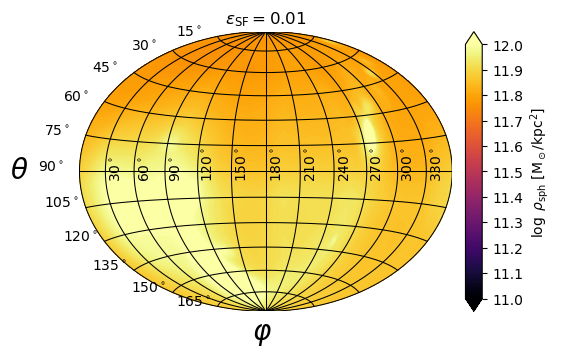

In [127]:
sim.plot(col_density, (10**(11), 10**(12)), unit=(const.M_sol/const.kpc**2), do_log=True, cmap='inferno', num_axis_lines=12, cbar_tick_increment=0.1, cbar_label=r'$\log~\rho_{\rm sph}$ [${\rm M_\odot/kpc^2}$]', title=sim.sim_latex, plot_type='AH') 

# sim.save_fig("dust-sph")


In [128]:
density_dust_sph = sim.interp_to_sph(sim.density_dust)
col_density_dust = np.sum(density_dust_sph * sim.dx_sph[R], axis=R)


<Axes: title={'center': '$\\varepsilon_{\\rm SF} = 0.01$'}>

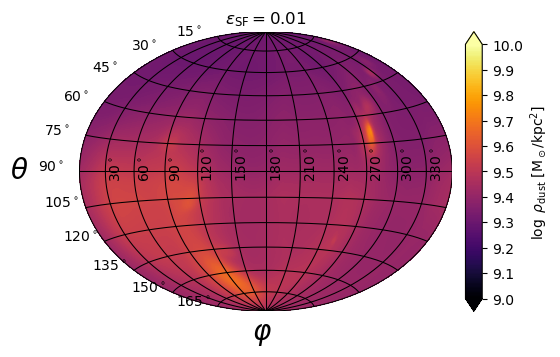

In [132]:
sim.plot(col_density_dust, (10**(9), 10**(10)), plot_type='AH', unit=(const.M_sol/const.kpc**2), do_log=True, cmap='inferno', num_axis_lines=12, cbar_tick_increment=0.1, cbar_label=r'$\log~\rho_{\rm dust}$ [${\rm M_\odot/kpc^2}$]', title=sim.sim_latex) 
    
# sim.save_fig("dust-sph")


### SFR

<Axes: xlabel='$x$ [kpc]', ylabel='$y$ [kpc]'>

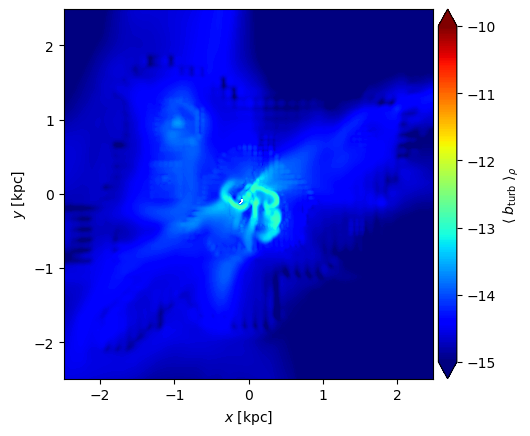

In [38]:
slice = Z
slice_label = ["x", "y", "z"][slice]

sim.plot(-sim.div(sim.vel_vec), (1e-15, 1e-10), avg=True, slice=slice, weight=sim.density, project=False, do_log=True, cmap='jet', cbar_label=r'$\langle~b_{\rm turb}~\rangle_\rho$', cbar_tick_increment=1.0)

# save_fig("bturb-postprocess")


<Axes: xlabel='$x$ [kpc]', ylabel='$y$ [kpc]'>

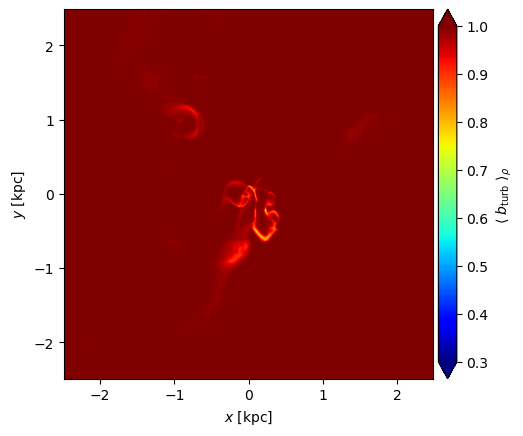

In [40]:
slice = Z
slice_label = ["x", "y", "z"][slice]

sim.plot(sim.b_turb, (0.3, 1.), avg=True, slice=slice, weight=sim.density, project=False, do_log=False, cmap='jet', cbar_label=r'$\langle~b_{\rm turb}~\rangle_\rho$', cbar_tick_increment=0.1)

# save_fig("bturb-postprocess")


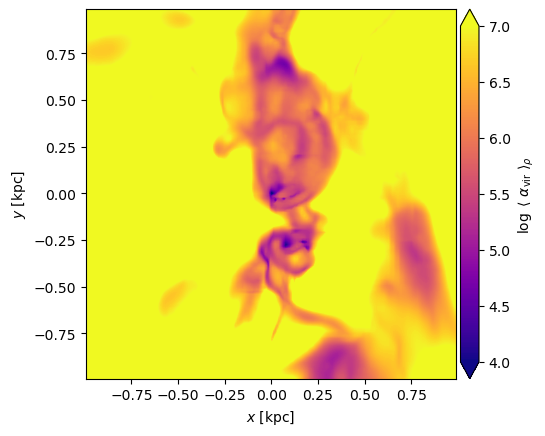

In [25]:
slice = Z
slice_label = ["x", "y", "z"][slice]

sim.plot(sim.alpha_vir, (1e4, 1e7), avg=True, slice=slice, weight=sim.density, project=True, do_log=True, cmap='plasma', cbar_label=r'$\log~\langle~\alpha_{\rm vir}~\rangle_\rho$', cbar_tick_increment=0.5, isocontours=[sim.alpha_vir_crit])

# sim.save_fig("SFR-eps1p0-proj-%s" % slice_label)


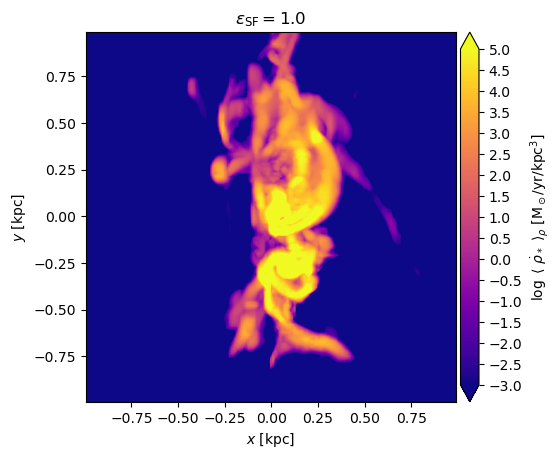

In [8]:
slice = Z
slice_label = ["x", "y", "z"][slice]

sim.plot(sim.SFR_density / (const.M_sol / const.yr / const.kpc**3), (1e-3, 1e5), title=r'$\varepsilon_{\rm SF} = 1.0$', avg=True, slice=slice, weight=sim.density, project=True, do_log=True, cmap='plasma', cbar_label=r'$\log~\langle~\dot{\rho}_*~\rangle_\rho$ [${\rm M_\odot/yr/kpc^3}$]', cbar_tick_increment=0.5)

# sim.save_fig("SFR-eps1p0-proj-%s" % slice_label)


### gas properties

<Axes: title={'center': '$|x| < 1~{\\rm kpc}$'}, xlabel='$y$ [kpc]', ylabel='$z$ [kpc]'>

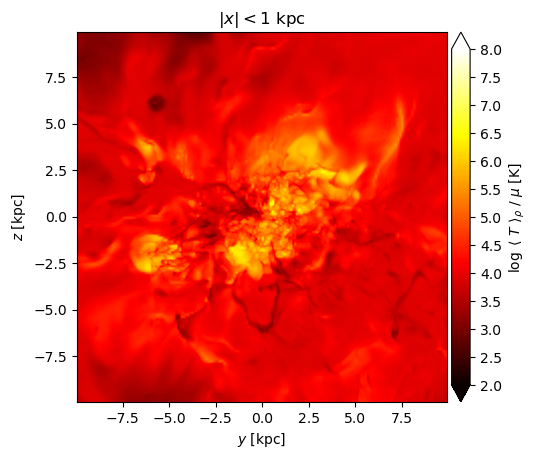

In [132]:
slice = X
slice_label = ["x", "y", "z"][slice]

sim.plot(sim.temp, (1e2, 1e8), title=r'$|%s| < 1~{\rm kpc}$' % slice_label, avg=True, slice=slice, weight=sim.density**2, project=True, do_log=True, cmap='hot', cbar_label=r'$\log~\langle~T~\rangle_\rho~/~\mu$ [K]', cbar_tick_increment=0.5)

# sim.save_fig("temp-proj-%s" % slice_label)


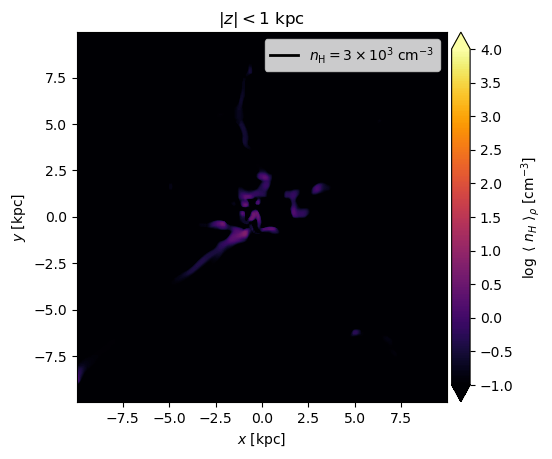

In [88]:
slice = Z
slice_label = ["x", "y", "z"][slice]

n_H_crit_ffb = 3e3
cond_ffb = sim.n_H < n_H_crit_ffb

ax = sim.plot(sim.n_H, (1e-1, 1e4), title=r'$|%s| < 1~{\rm kpc}$' % slice_label, avg=True, slice=slice, weight="density", project=False, do_log=True, cmap='inferno', cbar_label=r'$\log~\langle~n_H~\rangle_\rho$ [${\rm cm^{-3}}$]', cbar_tick_increment=0.5, isocontours=[n_H_crit_ffb])

custom_lines = [Line2D([0], [0], color='black', lw=2)]
ax.legend(custom_lines, [r'$n_{\rm H} = 3\times 10^{3}~{\rm cm^{-3}}$'])

# sim.save_fig("density-proj-%s" % slice_label)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


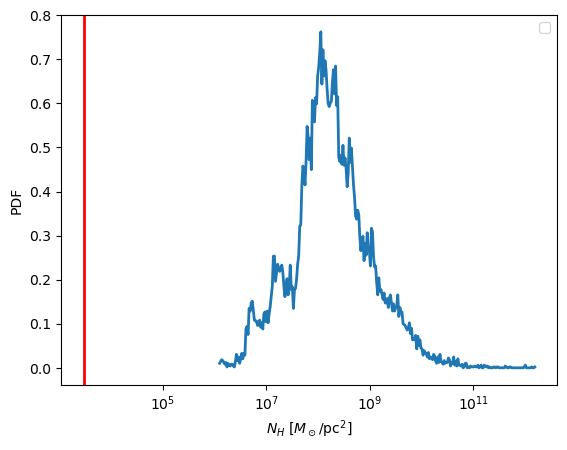

In [119]:
nbins = 300
Sigma_ffb = 3e3 * const.M_sol / const.pc**2
unit = const.M_sol / const.pc**2

for slice in [X]:

    N_H = np.sum(sim.density * sim.length_unit, axis=slice)

    hist, bins = np.histogram(np.log10(N_H), weights=None, bins=nbins)
    N_H_1d = 10**(bins[:-1] + np.diff(bins)[0])
    pixel_1d = hist
    pixel_pdf_1d = pixel_1d / np.sum(pixel_1d) / np.diff(bins)[0]
    plt.plot(N_H_1d / unit, pixel_pdf_1d, lw=2)

plt.legend()
plt.xscale('log')
plt.xlabel(r'$N_H$ [$M_\odot / {\rm pc^2}$]')
plt.ylabel(r'PDF')

plt.axvline(x=Sigma_ffb/unit, color='red', lw=2)

# save_fig("star-density-pdf", subdir=os.path.join("round%d" % sim_round, sim_name))



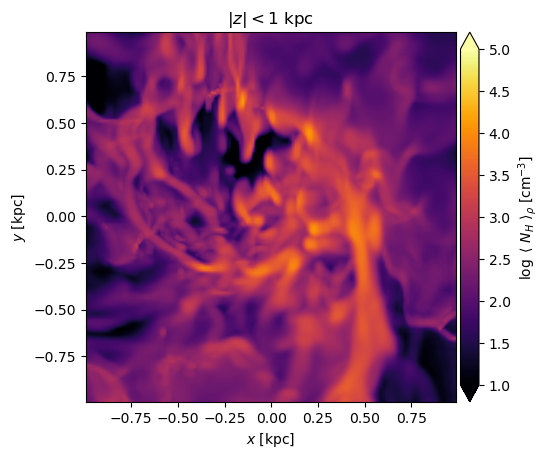

In [14]:
slice = Z
slice_label = ["x", "y", "z"][slice]

ax = sim.plot(sim.density, (1e1, 1e5), unit=(const.M_sol / const.pc**2), title=r'$|%s| < 1~{\rm kpc}$' % slice_label, avg=False, slice=slice, do_integrate=True, project=True, do_log=True, cmap='inferno', cbar_label=r'$\log~\langle~N_H~\rangle_\rho$ [${\rm cm^{-3}}$]', cbar_tick_increment=0.5)

#custom_lines = [Line2D([0], [0], color='black', lw=2)]
#ax.legend(custom_lines, [r'$n_{\rm H} = 3\times 10^{3}~{\rm cm^{-3}}$'])

# sim.save_fig("density-proj-%s" % slice_label)


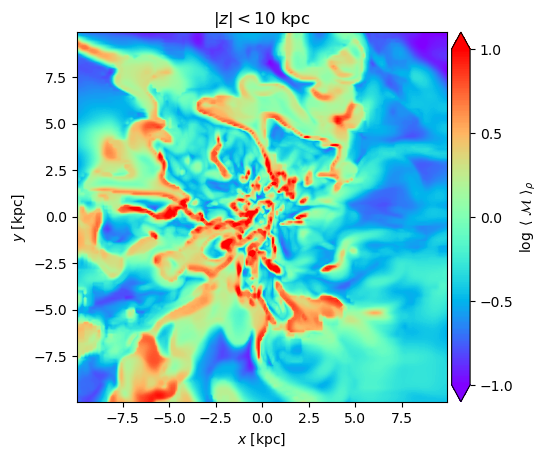

In [18]:
slice = Z
slice_label = ["x", "y", "z"][slice]

ax = sim.plot(sim.mach_turb, (1e-1, 1e1), title=r'$|%s| < %d~{\rm kpc}$' % (slice_label, sim.box_size/const.kpc/2), avg=True, slice=slice, project=False, do_log=True, cmap='rainbow', cbar_label=r'$\log~\langle~\mathcal{M}~\rangle_\rho$', cbar_tick_increment=0.5)

# sim.save_fig("density-proj-%s" % slice_label)


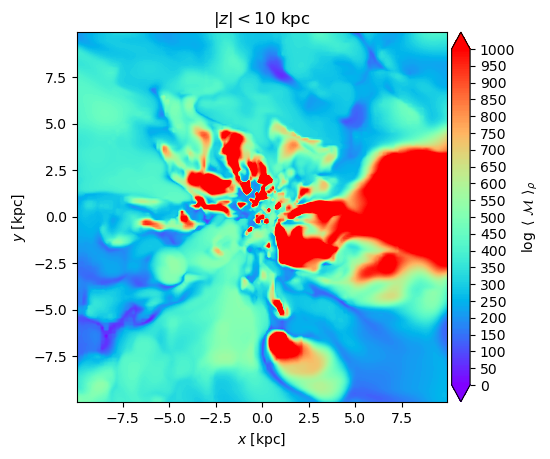

In [30]:
slice = Z
slice_label = ["x", "y", "z"][slice]

ax = sim.plot(sim.vel / const.km, (0, 1000), title=r'$|%s| < %d~{\rm kpc}$' % (slice_label, sim.box_size/const.kpc/2), avg=True, slice=slice, project=False, do_log=False, cmap='rainbow', cbar_label=r'$\log~\langle~\mathcal{M}~\rangle_\rho$', cbar_tick_increment=50)

# sim.save_fig("density-proj-%s" % slice_label)



In [34]:
10 * const.pc / (2 * 500 * const.km) / const.Myr


0.009785641806189752

Saved figure as 'alpha_vir_mach_phase_bigbox-112020232220.png'


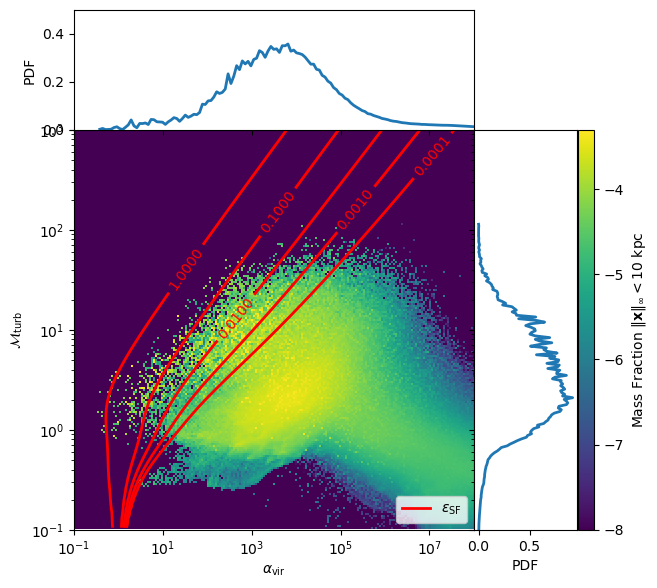

In [44]:
nbins=200
alpha_vir_extrema = (1e-1, 1e8)
mach_turb_extrema = (1e-1, 1e3)
mass_frac_extrema = (1e-8, 5e-4)
alpha_vir_crit = 10

fig = plt.figure(figsize=(4, 4))
ax1 = fig.add_axes([0, 0, 1, 1])

alpha_vir_1d, mach_turb_1d, mass_2d = sim.calc_phase(sim.alpha_vir, sim.mach_turb, alpha_vir_extrema, mach_turb_extrema, nbins=nbins)
mass_frac_2d = mass_2d / np.sum(sim.density * sim.dV)
im = ax1.pcolormesh(alpha_vir_1d, mach_turb_1d, np.log10(mass_frac_2d + epsilon), vmin=np.log10(mass_frac_extrema[0]), vmax=np.log10(mass_frac_extrema[1]))

ax1.set_xlabel(r"$\alpha_{\rm vir}$")
ax1.set_ylabel(r"$\mathcal{M}_{\rm turb}$")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(alpha_vir_extrema[0], alpha_vir_extrema[1])
ax1.set_ylim(mach_turb_extrema[0], mach_turb_extrema[1])
#ax1.axvline(x=alpha_vir_crit, color='red', lw=2)

alpha_vir_2d, mach_turb_2d = np.meshgrid(alpha_vir_1d, mach_turb_1d, indexing='ij')
epsilon_SF = calc_epsilon_SF_old(alpha_vir_2d, mach_turb_2d)
cs = plt.contour(alpha_vir_2d, mach_turb_2d, epsilon_SF, levels=[1e-4, 1e-3, 1e-2, 1e-1, 1e0], colors=['red', 'red', 'red', 'red'], linewidths=2)
plt.clabel(cs, [1e-4, 1e-3, 1e-2, 1e-1, 1e0])

custom_lines = [Line2D([0], [0], color='red', lw=2)]
ax1.legend(custom_lines, [r'$\varepsilon_{\rm SF}$'], loc=4)

ax2 = fig.add_axes([0, 1, 1, 0.3], sharex=ax1)
plt.setp(ax2.get_xticklabels(), visible=False);

hist, bins = np.histogram(np.log10(sim.alpha_vir).flatten(), weights=(sim.density * sim.dV).flatten(), bins=nbins)
alpha_vir_1d = 10**(bins[:-1] + np.diff(bins)[0])
mass_1d = hist
mass_pdf_1d = mass_1d / np.sum(sim.density * sim.dV) / np.diff(bins)[0]
ax2.plot(alpha_vir_1d, mass_pdf_1d, lw=2)
#ax2.axvline(x=alpha_vir_crit, color='red', lw=2)

ax2.set_ylabel("PDF")
ax2.set_ylim(0, 0.5)

ax3 = fig.add_axes([1, 0, 0.3, 1], sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False);

hist, bins = np.histogram(np.log10(sim.mach_turb).flatten(), weights=(sim.density * sim.dV).flatten(), bins=nbins)
mach_turb_1d = 10**(bins[:-1] + np.diff(bins)[0])
mass_1d = hist
mass_pdf_1d = mass_1d / np.sum(sim.density * sim.dV) / np.diff(bins)[0]
ax3.plot(mass_pdf_1d, mach_turb_1d, lw=2)

ax3.set_xlabel("PDF")

cbar_ticks = np.arange(np.log10(mass_frac_extrema[0]), np.log10(mass_frac_extrema[1])+1)
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="15%", pad=0.01)
plt.colorbar(im, ax=ax1, cax=cax, ticks=cbar_ticks, label=r"Mass Fraction $\|\mathbf{x}\|_\infty < %d~{\rm kpc}$" % (sim.box_size/const.kpc/2))

save_fig("alpha_vir_mach_phase_bigbox")


Saved figure as 'vturb-nH-phase-gas-bigbox-112720232204.png'


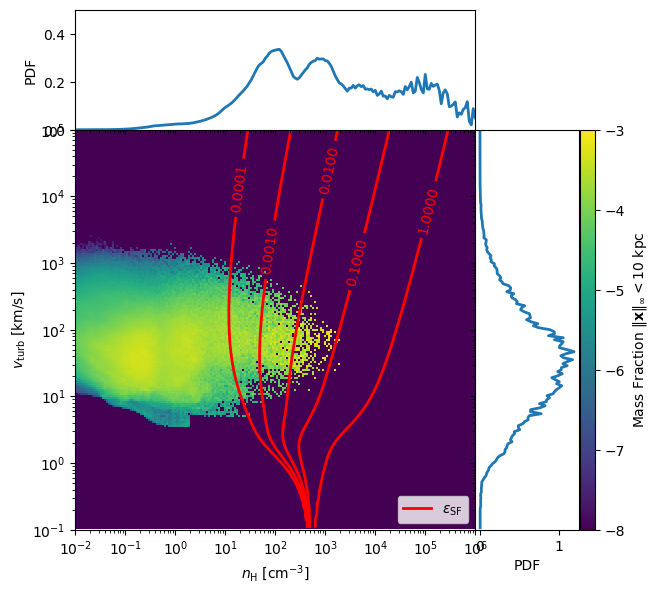

In [29]:
nbins = 200
n_H_extrema = (1e-2, 1e6)
vel_turb_extrema = (1e-1 * const.km, 1e5 * const.km)
mass_frac_extrema = (1e-8, 1e-3)

fig = plt.figure(figsize=(4, 4))
ax1 = fig.add_axes([0, 0, 1, 1])

n_H_1d, vel_turb_1d, mass_2d = sim.calc_phase(sim.n_H, sim.vel_turb, n_H_extrema, vel_turb_extrema, nbins=nbins)
mass_frac_2d = mass_2d / np.sum(sim.density * sim.dV)
im = ax1.pcolormesh(n_H_1d, vel_turb_1d / const.km, np.log10(mass_frac_2d + epsilon), vmin=np.log10(mass_frac_extrema[0]), vmax=np.log10(mass_frac_extrema[1]))

ax1.set_xlabel(r"$n_{\rm H}$ [${\rm cm^{-3}}$]")
ax1.set_ylabel(r"$v_{\rm turb}$ [${\rm km/s}$]")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(*n_H_extrema)
ax1.set_ylim(vel_turb_extrema[0] / const.km, vel_turb_extrema[1] / const.km)

n_H_2d, vel_turb_2d = np.meshgrid(n_H_1d, vel_turb_1d, indexing='ij')
rho_2d = n_H_2d * const.m_p
epsilon_SF = calc_epsilon_SF(rho_2d, vel_turb_2d, b_turb=1.0)

cs = plt.contour(n_H_2d, vel_turb_2d / const.km, epsilon_SF, levels=[1e-4, 1e-3, 1e-2, 1e-1, 1e0], colors='red', linewidths=2)
plt.clabel(cs, [1e-4, 1e-3, 1e-2, 1e-1, 1e0])

custom_lines = [Line2D([0], [0], color='red', lw=2)]
ax1.legend(custom_lines, [r'$\varepsilon_{\rm SF}$'], loc=4)

ax2 = fig.add_axes([0, 1, 1, 0.3], sharex=ax1)
plt.setp(ax2.get_xticklabels(), visible=False);

hist, bins = np.histogram(np.log10(sim.n_H).flatten(), weights=(sim.density * sim.dV).flatten(), bins=nbins)
alpha_vir_1d = 10**(bins[:-1] + np.diff(bins)[0])
mass_1d = hist
mass_pdf_1d = mass_1d / np.sum(sim.density * sim.dV) / np.diff(bins)[0]
ax2.plot(n_H_1d, mass_pdf_1d, lw=2)
#ax2.axvline(x=alpha_vir_crit, color='red', lw=2)

ax2.set_ylabel("PDF")
ax2.set_ylim(0, 0.5)

ax3 = fig.add_axes([1, 0, 0.3, 1], sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False);

hist, bins = np.histogram(np.log10(sim.vel_turb).flatten(), weights=(sim.density * sim.dV).flatten(), bins=nbins)
mach_turb_1d = 10**(bins[:-1] + np.diff(bins)[0])
mass_1d = hist
mass_pdf_1d = mass_1d / np.sum(sim.density * sim.dV) / np.diff(bins)[0]
ax3.plot(mass_pdf_1d, vel_turb_1d / const.km, lw=2)

ax3.set_xlabel("PDF")

cbar_ticks = np.arange(np.log10(mass_frac_extrema[0]), np.log10(mass_frac_extrema[1])+1)
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="15%", pad=0.01)
plt.colorbar(im, ax=ax1, cax=cax, ticks=cbar_ticks, label=r"Mass Fraction $\|\mathbf{x}\|_\infty < %d~{\rm kpc}$" % (sim.box_size/const.kpc/2))

save_fig("vturb-nH-phase-gas-bigbox")


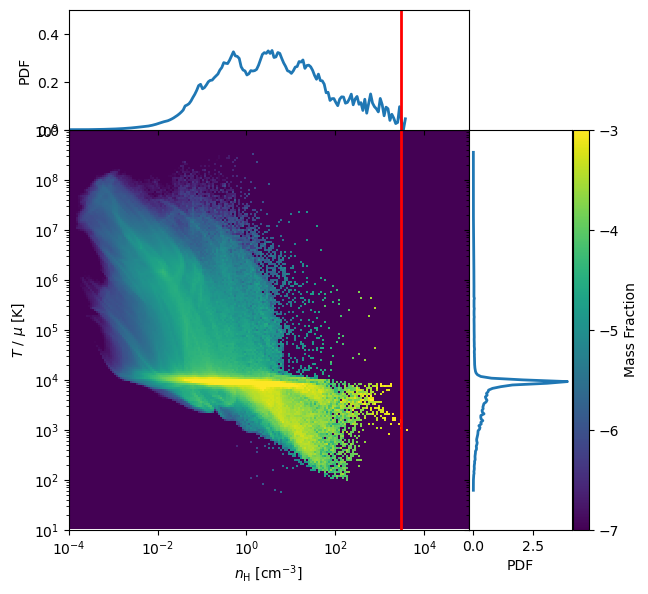

In [107]:
nbins=200
ffb_density = 3e3
n_H_extrema = (1e-4, 1e5)
temp_extrema = (1e1, 1e9)
mass_frac_extrema = (1e-7, 1e-3)

fig = plt.figure(figsize=(4, 4))
ax1 = fig.add_axes([0, 0, 1, 1])

n_H_2d, temperature_2d, mass_2d = sim.calc_phase(sim.n_H, sim.temp, n_H_extrema, temp_extrema, nbins=nbins)
mass_frac_2d = mass_2d / np.sum(sim.density * sim.dV)
im = ax1.pcolormesh(n_H_2d, temperature_2d, np.log10(mass_frac_2d + epsilon), vmin=np.log10(mass_frac_extrema[0]), vmax=np.log10(mass_frac_extrema[1]))

ax1.set_xlabel(r"$n_{\rm H}$ [${\rm cm^{-3}}$]")
ax1.set_ylabel(r"$T~/~\mu$ [K]")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(n_H_extrema[0], n_H_extrema[1])
ax1.set_ylim(temp_extrema[0], temp_extrema[1])
ax1.axvline(x=ffb_density, color='red', lw=2)

ax2 = fig.add_axes([0, 1, 1, 0.3], sharex=ax1)
plt.setp(ax2.get_xticklabels(), visible=False);

hist, bins = np.histogram(np.log10(sim.n_H).flatten(), weights=(sim.density * sim.dV).flatten(), bins=nbins)
n_H_1d = 10**(bins[:-1] + np.diff(bins)[0])
mass_1d = hist
mass_pdf_1d = mass_1d / np.sum(sim.density * sim.dV) / np.diff(bins)[0]
ax2.plot(n_H_1d, mass_pdf_1d, lw=2)
ax2.axvline(x=ffb_density, lw=2, color='red')

ax2.set_ylabel("PDF")
ax2.set_ylim(0, 0.5)

ax3 = fig.add_axes([1, 0, 0.3, 1], sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False);

hist, bins = np.histogram(np.log10(sim.temp).flatten(), weights=(sim.density * sim.dV).flatten(), bins=nbins)
temp_1d = 10**(bins[:-1] + np.diff(bins)[0])
mass_1d = hist
mass_pdf_1d = mass_1d / np.sum(sim.density * sim.dV) / np.diff(bins)[0]
ax3.plot(mass_pdf_1d, temp_1d, lw=2)

ax3.set_xlabel("PDF")

cbar_ticks = np.arange(np.log10(mass_frac_extrema[0]), np.log10(mass_frac_extrema[1])+1)
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="15%", pad=0.01)
plt.colorbar(im, ax=ax1, cax=cax, ticks=cbar_ticks, label=r"Mass Fraction")

# sim.save_fig("density-temp-phase")


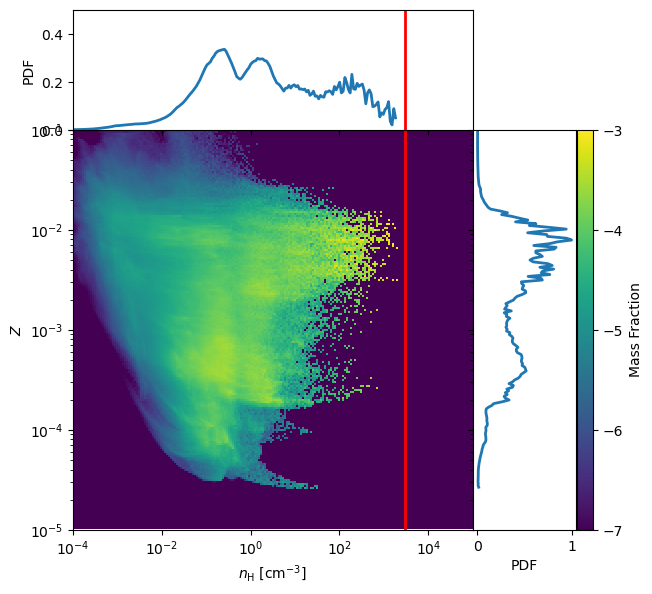

In [90]:
nbins=200
ffb_density = 3e3
n_H_extrema = (1e-4, 1e5)
metallicity_extrema = (1e-5, 1e-1)
mass_frac_extrema = (1e-7, 1e-3)

fig = plt.figure(figsize=(4, 4))
ax1 = fig.add_axes([0, 0, 1, 1])

n_H_2d, metallicity_2d, mass_2d = sim.calc_phase(sim.n_H, sim.metallicity, n_H_extrema, metallicity_extrema, nbins=nbins)
mass_frac_2d = mass_2d / np.sum(sim.density * sim.dV)
im = ax1.pcolormesh(n_H_2d, metallicity_2d, np.log10(mass_frac_2d + epsilon), vmin=np.log10(mass_frac_extrema[0]), vmax=np.log10(mass_frac_extrema[1]))

ax1.set_xlabel(r"$n_{\rm H}$ [${\rm cm^{-3}}$]")
ax1.set_ylabel(r"$Z$")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(n_H_extrema[0], n_H_extrema[1])
ax1.set_ylim(metallicity_extrema[0], metallicity_extrema[1])
ax1.axvline(x=ffb_density, color='red', lw=2)

ax2 = fig.add_axes([0, 1, 1, 0.3], sharex=ax1)
plt.setp(ax2.get_xticklabels(), visible=False);

hist, bins = np.histogram(np.log10(sim.n_H).flatten(), weights=(sim.density * sim.dV).flatten(), bins=nbins)
n_H_1d = 10**(bins[:-1] + np.diff(bins)[0])
mass_1d = hist
mass_pdf_1d = mass_1d / np.sum(sim.density * sim.dV) / np.diff(bins)[0]
ax2.plot(n_H_1d, mass_pdf_1d, lw=2)
ax2.axvline(x=ffb_density, lw=2, color='red')

ax2.set_ylabel("PDF")
ax2.set_ylim(0, 0.5)

ax3 = fig.add_axes([1, 0, 0.3, 1], sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False);

hist, bins = np.histogram(np.log10(sim.metallicity).flatten(), weights=(sim.density * sim.dV).flatten(), bins=nbins)
metallicity_1d = 10**(bins[:-1] + np.diff(bins)[0])
mass_1d = hist
mass_pdf_1d = mass_1d / np.sum(sim.density * sim.dV) / np.diff(bins)[0]
ax3.plot(mass_pdf_1d, metallicity_1d, lw=2)

ax3.set_xlabel("PDF")

cbar_ticks = np.arange(np.log10(mass_frac_extrema[0]), np.log10(mass_frac_extrema[1])+1)
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="15%", pad=0.01)
plt.colorbar(im, ax=ax1, cax=cax, ticks=cbar_ticks, label=r"Mass Fraction")

# sim.save_fig("density-temp-phase")


In [126]:
r1d, density1d = sim.calc_radial_profile(sim.density, nbins=50)


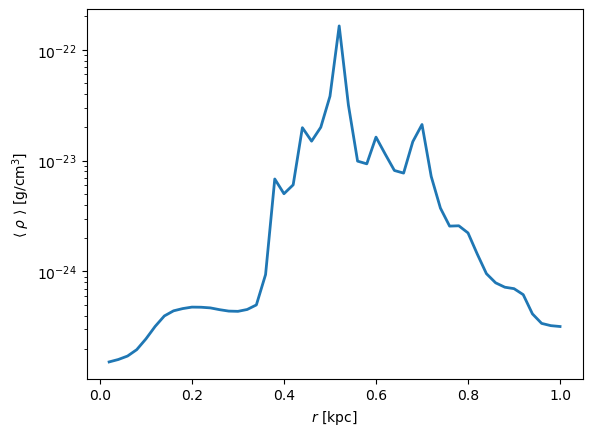

In [128]:
plt.plot(r1d / const.kpc, density1d, lw=2)

plt.xlabel(r'$r$ [kpc]')
plt.ylabel(r'$\langle~\rho~\rangle$ [${\rm g/cm^3}$]')

plt.yscale('log')

# sim.save_fig("density-1d")


### Summary Statistics

In [15]:
#sim.print_stats()